In [1]:
from cordex import mask

%matplotlib inline

import matplotlib.pyplot as plt

# fig = plt.figure(1, figsize=(8, 14), frameon=False, dpi=100)
# fig.add_axes([0, 0, 1, 1])
# ax = plt.gca()

# corners = ((x1, y1), (x2, y2))
# ax.update_datalim(corners)

ImportError: cannot import name 'mask' from 'cordex' (/mnt/lustre01/pf/zmaw/g300046/python/packages/py-cordex/cordex/__init__.py)

In [3]:
import geopandas as gpd

url = "https://services2.arcgis.com/jUpNdisbWqRpMo35/arcgis/rest/services/Deutschland_Kreisgrenzen_2018/FeatureServer"
url = "vg250_01-01.gk3.shape.ebenen/vg250_ebenen_0101/VG250_LAN.shp"
url = "zip://ne_10m_admin_0_countries.zip"
shp = gpd.read_file(url)
print(shp)
masks = mask.get_regionmask(url, names="NAME_EN", abbrevs="_from_name")

          featurecla  scalerank  LABELRANK                    SOVEREIGNT  \
0    Admin-0 country          5          2                     Indonesia   
1    Admin-0 country          5          3                      Malaysia   
2    Admin-0 country          6          2                         Chile   
3    Admin-0 country          0          3                       Bolivia   
4    Admin-0 country          0          2                          Peru   
..               ...        ...        ...                           ...   
250  Admin-0 country          0          4                         China   
251  Admin-0 country          6          5                     Australia   
252  Admin-0 country          6          8  Bajo Nuevo Bank (Petrel Is.)   
253  Admin-0 country          6          5               Serranilla Bank   
254  Admin-0 country          6          6              Scarborough Reef   

    SOV_A3  ADM0_DIF  LEVEL               TYPE                         ADMIN  \
0      

In [4]:
masks

<regionmask.Regions>
Name:     unnamed

Regions:
   0          Ind0                    Indonesia
   1          Mal0                     Malaysia
   2           Chi                        Chile
   3           Bol                      Bolivia
   4           Per                         Peru
...            ...                          ...
 250           Mac                        Macau
 251  AshandCarIsl  Ashmore and Cartier Islands
 252     BajNueBan              Bajo Nuevo Bank
 253        SerBan              Serranilla Bank
 254        ScaSho            Scarborough Shoal

[255 regions]

<GeoAxesSubplot:>

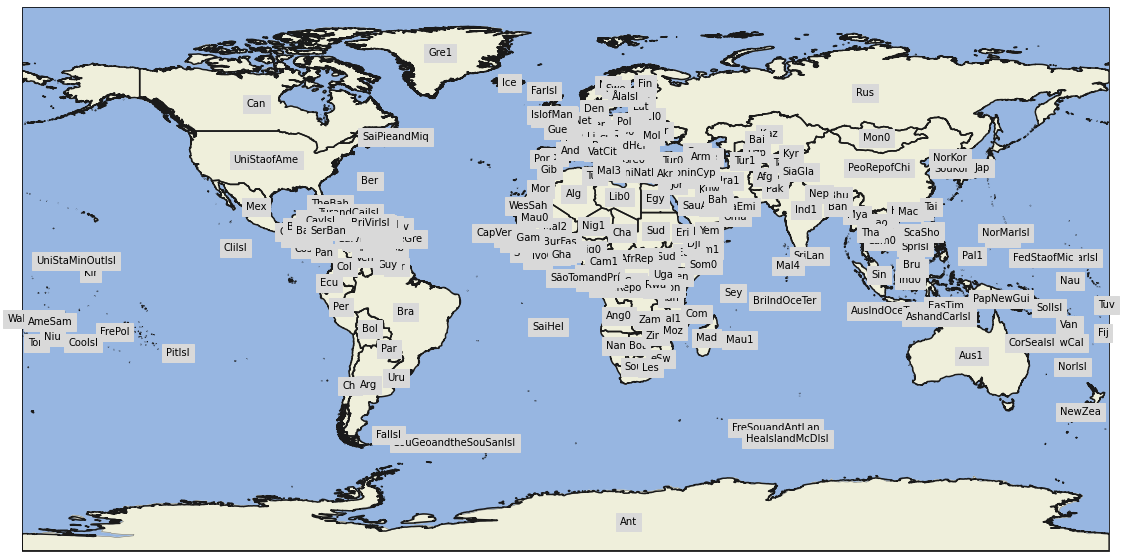

In [6]:
fig, ax = plt.subplots(figsize=(25, 10))
masks.plot(label="abbrev", add_land=True, add_ocean=True)

In [45]:
import numpy as np
import regionmask

lon = np.arange(-180, 180)
lat = np.arange(-90, 90)
mask_3D = regionmask.mask_3D_geopandas(shp, lon, lat)

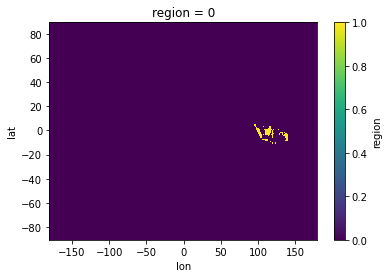

In [53]:
mask_3D[0].plot()

In [183]:
import geopandas as gpd

url = "https://services2.arcgis.com/jUpNdisbWqRpMo35/arcgis/rest/services/Deutschland_Kreisgrenzen_2018/FeatureServer"
url = "vg250_01-01.gk3.shape.ebenen/vg250_ebenen_0101/VG250_LAN.shp"
url = "vg2500_01-01.tm32.shape/vg2500/vg2500_krs.shp"
# url = "zip://ne_10m_admin_0_countries.zip"

shp = gpd.read_file(url).to_crs(
    "EPSG:4326"
)  # convert to WGS84 latitude-longitude projection
shp

,ADE,ARS,ARS_0,GEN,geometry
0,4,01001,010010000000,Flensburg,"POLYGON ((9.48982 54.82296, 9.50467 54.81004, ..."
1,4,01002,010020000000,Kiel,"POLYGON ((10.19057 54.38909, 10.18370 54.38910..."
2,4,01003,010030000000,Lübeck,"POLYGON ((10.89297 53.95695, 10.90337 53.95705..."
3,4,01004,010040000000,Neumünster,"POLYGON ((10.03454 54.12915, 10.02277 54.10938..."
4,4,01051,010510000000,Dithmarschen,"MULTIPOLYGON (((8.68760 54.05944, 8.69258 54.0..."
...,...,...,...,...,...
396,4,16073,160730000000,Saalfeld-Rudolstadt,"POLYGON ((11.32074 50.79488, 11.32374 50.79444..."
397,4,16074,160740000000,Saale-Holzland-Kreis,"POLYGON ((12.01807 50.96757, 12.02085 50.94806..."
398,4,16075,160750000000,Saale-Orla-Kreis,"POLYGON ((11.94482 50.59236, 11.92423 50.58608..."
399,4,16076,160760000000,Greiz,"POLYGON ((12.22219 50.94284, 12.23787 50.92905..."


In [184]:
filt = shp["GEN"] == "Würzburg"

In [185]:
wuerzburg = shp[filt]
poly = wuerzburg["geometry"].iloc[0]
poly.exterior.coords
list(poly.exterior.coords)

[(9.872945041998117, 49.81486257894656),
 (9.873395134976192, 49.81975047661464),
 (9.894442539638437, 49.82676530191076),
 (9.909512035159242, 49.844091984303844),
 (9.919975972568565, 49.845108531690705),
 (9.986703067237334, 49.838645595297905),
 (9.989322849118993, 49.83692996702424),
 (10.003418311817029, 49.81789184071268),
 (10.007662825361647, 49.80411801946988),
 (10.00908273520063, 49.79583801955417),
 (9.99999751347909, 49.78747628556136),
 (9.998662402380837, 49.786264800599774),
 (9.996415834870804, 49.787145553006305),
 (9.988768811702277, 49.79012536194217),
 (9.985391028704651, 49.79020005917823),
 (9.953704732367841, 49.76487875041965),
 (9.955654820254981, 49.764393293568915),
 (9.967489011767793, 49.7618763202571),
 (9.970134516197676, 49.76127691135317),
 (9.973677236668733, 49.75991688528746),
 (9.975662324697733, 49.75873849396158),
 (9.978061980580987, 49.756473359460074),
 (9.98080622182074, 49.75313911479852),
 (9.984647792264969, 49.74846030668284),
 (9.985626

In [186]:
wuerzburg

,ADE,ARS,ARS_0,GEN,geometry
294,4,09663,096630000000,Würzburg,"POLYGON ((9.87295 49.81486, 9.87340 49.81975, ..."
303,4,09679,096790000000,Würzburg,"POLYGON ((10.18923 49.89228, 10.16905 49.88374..."


In [187]:
import regionmask

masks = regionmask.from_geopandas(shp, names="GEN")
print(masks)

ValueError: names cannot contain duplicate values, found 47          Osnabrück
57          Osnabrück
135            Kassel
138            Kassel
159    Kaiserslautern
172    Kaiserslautern
184         Heilbronn
185         Heilbronn
192         Karlsruhe
193         Karlsruhe
223           München
224         Rosenheim
238           München
241         Rosenheim
245          Landshut
246            Passau
251          Landshut
252            Passau
258        Regensburg
264        Regensburg
267           Bamberg
268          Bayreuth
269            Coburg
270               Hof
271           Bamberg
272          Bayreuth
273            Coburg
275               Hof
280           Ansbach
282             Fürth
285           Ansbach
287             Fürth
292     Aschaffenburg
293       Schweinfurt
294          Würzburg
295     Aschaffenburg
302       Schweinfurt
303          Würzburg
304          Augsburg
309          Augsburg
343           Rostock
345           Rostock
361           Leipzig
362           Leipzig
Name: GEN, dtype: object

In [6]:
import matplotlib.pyplot as plt

%matplotlib inline
fig, ax = plt.subplots(figsize=(25, 10))
# fig.set_size_inches(800,800)
masks.plot()

<GeoAxesSubplot:>

ValueError: Image size of 1101x319189 pixels is too large. It must be less than 2^16 in each direction.

<Figure size 1800x720 with 1 Axes>

In [9]:
import regionmask

srex = regionmask.defined_regions.srex

In [13]:
srex

<regionmask.Regions>
Name:     SREX
Source:   Seneviratne et al., 2012 (https://www.ipcc.ch/site/assets/uploads/2...

Regions:
  1  ALA        Alaska/N.W. Canada
  2  CGI      Canada/Greenl./Icel.
  3  WNA          W. North America
  4  CNA          C. North America
  5  ENA          E. North America
..   ...                       ...
 22  EAS                   E. Asia
 23  SAS                   S. Asia
 24  SEA                 S.E. Asia
 25  NAU              N. Australia
 26  SAU  S. Australia/New Zealand

[26 regions]

<GeoAxesSubplot:>

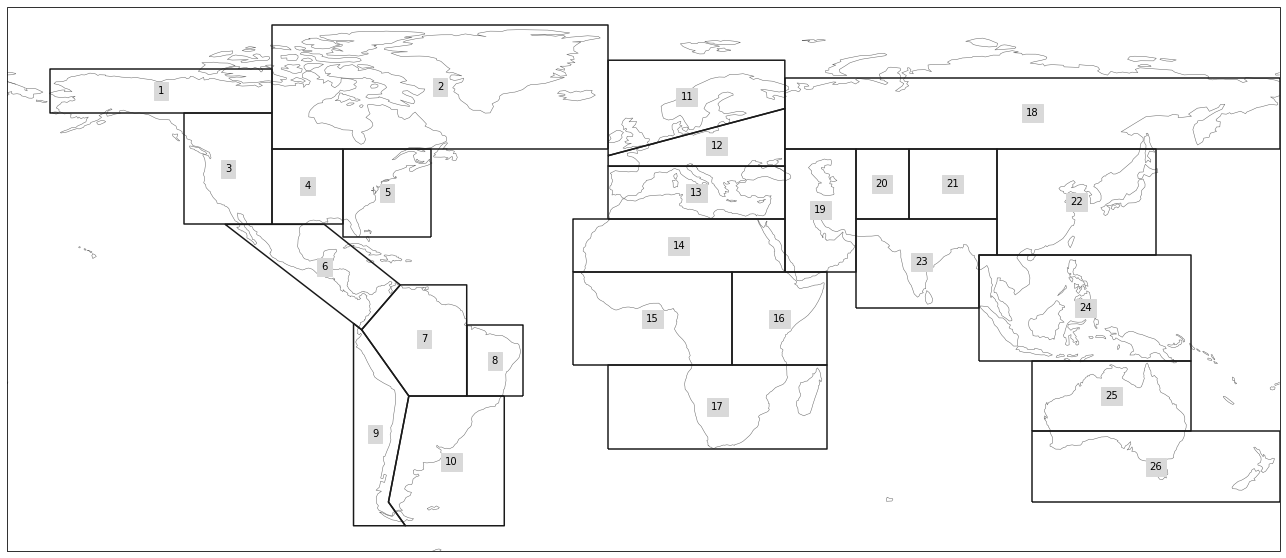

In [18]:
fig, ax = plt.subplots(figsize=(25, 10))
srex.plot()

In [79]:
tas_file = (
    "tas_EUR-11_ECMWF-ERAINT_evaluation_r1i1p1_GERICS-REMO2015_v1_mon_197902-198012.nc"
)
import xarray as xr

tas = xr.open_dataset(tas_file)

In [80]:
tas

<xarray.Dataset>
Dimensions:                     (bnds: 2, rlat: 412, rlon: 424, time: 23, vertices: 4)
Coordinates:
  * time                        (time) datetime64[ns] 1979-02-15 ... 1980-12-...
  * rlat                        (rlat) float64 -23.38 -23.27 ... 21.72 21.84
  * rlon                        (rlon) float64 -28.38 -28.27 ... 18.04 18.16
    lat                         (rlat, rlon) float32 ...
    lon                         (rlat, rlon) float32 ...
    height                      float64 ...
Dimensions without coordinates: bnds, vertices
Data variables:
    time_bnds                   (time, bnds) datetime64[ns] ...
    rotated_latitude_longitude  int32 ...
    lat_vertices                (rlat, rlon, vertices) float32 ...
    lon_vertices                (rlat, rlon, vertices) float32 ...
    tas                         (time, rlat, rlon) float32 ...
Attributes:
    institution:                    Helmholtz-Zentrum Geesthacht, Climate Ser...
    institute_id:                   GERICS
    experiment_id:                  evaluation
    source:                         GERICS-REMO2015
    model_id:                       GERICS-REMO2015
    contact:                        gerics-cordex@hzg.de
    comment:                        CORDEX Europe RCM REMO 0.11 deg EUR-11.
    references:                     http://www.remo-rcm.de/
    initialization_method:          1
    physics_version:                1
    tracking_id:                    07c8a6b9-424a-4867-815c-5fbce2675d0b
    CORDEX_domain:                  EUR-11
    driving_experiment:             ECMWF-ERAINT, evaluation, r1i1p1
    driving_model_id:               ECMWF-ERAINT
    driving_model_ensemble_member:  r1i1p1
    driving_experiment_name:        evaluation
    rcm_version_id:                 v1
    product:                        output
    experiment:                     Evaluation run with reanalysis forcing
    frequency:                      mon
    creation_date:                  2018-06-15T15:20:54Z
    history:                        2018-06-15T15:20:54Z CMOR rewrote data to...
    Conventions:                    CF-1.4
    project_id:                     CORDEX
    table_id:                       Table mon (Mar 2015) db0b230ff4a2c922671f...
    title:                          GERICS-REMO2015 model output prepared for...
    modeling_realm:                 atmos
    realization:                    1
    cmor_version:                   2.9.1

In [341]:
import geopandas as gpd

url = "vg2500_01-01.gk3.shape/vg2500/vg2500_krs.shp"
# url = "zip://ne_10m_admin_0_countries.zip"
shp = gpd.read_file(url).to_crs("EPSG:4326")
shp

,ADE,ARS,ARS_0,GEN,geometry
0,4,01001,010010000000,Flensburg,"POLYGON ((9.48982 54.82296, 9.50467 54.81004, ..."
1,4,01002,010020000000,Kiel,"POLYGON ((10.19057 54.38909, 10.18370 54.38910..."
2,4,01003,010030000000,Lübeck,"POLYGON ((10.89297 53.95695, 10.90337 53.95705..."
3,4,01004,010040000000,Neumünster,"POLYGON ((10.03454 54.12915, 10.02277 54.10938..."
4,4,01051,010510000000,Dithmarschen,"MULTIPOLYGON (((8.68760 54.05944, 8.69258 54.0..."
...,...,...,...,...,...
396,4,16073,160730000000,Saalfeld-Rudolstadt,"POLYGON ((11.32074 50.79488, 11.32374 50.79444..."
397,4,16074,160740000000,Saale-Holzland-Kreis,"POLYGON ((12.01807 50.96757, 12.02085 50.94806..."
398,4,16075,160750000000,Saale-Orla-Kreis,"POLYGON ((11.94482 50.59236, 11.92423 50.58608..."
399,4,16076,160760000000,Greiz,"POLYGON ((12.22219 50.94284, 12.23787 50.92905..."


In [342]:
shp.GEN.unique()

array(['Flensburg', 'Kiel', 'Lübeck', 'Neumünster', 'Dithmarschen',
       'Herzogtum Lauenburg', 'Nordfriesland', 'Ostholstein', 'Plön',
       'Rendsburg-Eckernförde', 'Schleswig-Flensburg', 'Segeberg',
       'Steinburg', 'Stormarn', 'Hamburg', 'Braunschweig', 'Salzgitter',
       'Wolfsburg', 'Gifhorn', 'Göttingen', 'Goslar', 'Helmstedt',
       'Northeim', 'Peine', 'Wolfenbüttel', 'Region Hannover', 'Diepholz',
       'Hameln-Pyrmont', 'Hildesheim', 'Holzminden', 'Pinneberg',
       'Nienburg (Weser)', 'Schaumburg', 'Celle', 'Cuxhaven', 'Harburg',
       'Lüchow-Dannenberg', 'Lüneburg', 'Osterholz', 'Rotenburg (Wümme)',
       'Heidekreis', 'Stade', 'Uelzen', 'Verden', 'Delmenhorst', 'Emden',
       'Oldenburg (Oldb)', 'Osnabrück', 'Wilhelmshaven', 'Ammerland',
       'Aurich', 'Cloppenburg', 'Emsland', 'Friesland',
       'Grafschaft Bentheim', 'Leer', 'Oldenburg', 'Vechta',
       'Wesermarsch', 'Wittmund', 'Bremen', 'Bremerhaven', 'Düsseldorf',
       'Duisburg', 'Essen', 'Kref

In [343]:
filt = shp["GEN"] == "Würzburg"

<AxesSubplot:>

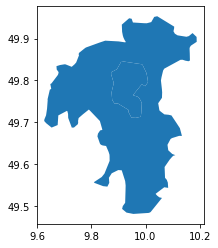

In [344]:
wuerzburg = shp[filt]
wuerzburg.plot()

In [325]:
wuerzburg

,ADE,ARS,ARS_0,GEN,geometry
294,4,09663,096630000000,Würzburg,"POLYGON ((9.87295 49.81486, 9.87340 49.81975, ..."
303,4,09679,096790000000,Würzburg,"POLYGON ((10.18923 49.89228, 10.16905 49.88374..."


In [354]:
shp["rmask_name"] = shp["ARS"] + "_" + shp["GEN"]
shp

,ADE,ARS,ARS_0,GEN,geometry,rmask_name
0,4,01001,010010000000,Flensburg,"POLYGON ((9.48982 54.82296, 9.50467 54.81004, ...",01001_Flensburg
1,4,01002,010020000000,Kiel,"POLYGON ((10.19057 54.38909, 10.18370 54.38910...",01002_Kiel
2,4,01003,010030000000,Lübeck,"POLYGON ((10.89297 53.95695, 10.90337 53.95705...",01003_Lübeck
3,4,01004,010040000000,Neumünster,"POLYGON ((10.03454 54.12915, 10.02277 54.10938...",01004_Neumünster
4,4,01051,010510000000,Dithmarschen,"MULTIPOLYGON (((8.68760 54.05944, 8.69258 54.0...",01051_Dithmarschen
...,...,...,...,...,...,...
396,4,16073,160730000000,Saalfeld-Rudolstadt,"POLYGON ((11.32074 50.79488, 11.32374 50.79444...",16073_Saalfeld-Rudolstadt
397,4,16074,160740000000,Saale-Holzland-Kreis,"POLYGON ((12.01807 50.96757, 12.02085 50.94806...",16074_Saale-Holzland-Kreis
398,4,16075,160750000000,Saale-Orla-Kreis,"POLYGON ((11.94482 50.59236, 11.92423 50.58608...",16075_Saale-Orla-Kreis
399,4,16076,160760000000,Greiz,"POLYGON ((12.22219 50.94284, 12.23787 50.92905...",16076_Greiz


In [355]:
kreise = regionmask.from_geopandas(shp, names="rmask_name", abbrevs="_from_name")
kreise

<regionmask.Regions>
Name:     unnamed

Regions:
   0       0100             01001_Flensburg
   1       0101                  01002_Kiel
   2       0102                01003_Lübeck
   3       0103            01004_Neumünster
   4       0104          01051_Dithmarschen
...         ...                         ...
 396     160Rud   16073_Saalfeld-Rudolstadt
 397  160HolKre  16074_Saale-Holzland-Kreis
 398  160OrlKre      16075_Saale-Orla-Kreis
 399      16014                 16076_Greiz
 400    160Lan1      16077_Altenburger Land

[401 regions]

In [193]:
w_mask = regionmask.from_geopandas(wuerzburg)
w_mask

<regionmask.Regions>
Name:     unnamed

Regions:
 294  r294  Region294
 303  r303  Region303

[2 regions]

In [336]:
# url = "vg250_01-01.gk3.shape.ebenen/vg250_ebenen_0101/VG250_LAN.shp"
url = "vg2500_01-01.gk3.shape/vg2500/vg2500_lan.shp"
# url = "zip://ne_10m_admin_0_countries.zip"
shp = gpd.read_file(url)
print(shp.crs)
shp = shp.to_crs("EPSG:4326")

epsg:31467


<AxesSubplot:>

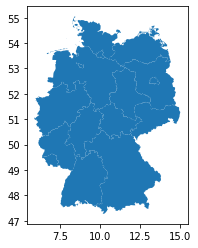

In [337]:
shp.plot()

In [338]:
shp

,ADE,ARS,ARS_0,GEN,geometry
0,2,02,020000000000,Hamburg,"MULTIPOLYGON (((10.19114 53.72299, 10.18210 53..."
1,2,03,030000000000,Niedersachsen,"MULTIPOLYGON (((6.80525 53.59772, 6.80398 53.5..."
2,2,04,040000000000,Bremen,"MULTIPOLYGON (((8.52976 53.21640, 8.55399 53.2..."
3,2,05,050000000000,Nordrhein-Westfalen,"POLYGON ((8.66673 52.52149, 8.70289 52.50053, ..."
4,2,06,060000000000,Hessen,"POLYGON ((9.50560 51.62777, 9.50842 51.62712, ..."
5,2,07,070000000000,Rheinland-Pfalz,"POLYGON ((7.84657 50.87861, 7.85901 50.87733, ..."
6,2,08,080000000000,Baden-Württemberg,"MULTIPOLYGON (((8.66981 47.68563, 8.66567 47.6..."
7,2,09,090000000000,Bayern,"POLYGON ((10.45458 47.55586, 10.47207 47.56964..."
8,2,10,100000000000,Saarland,"POLYGON ((7.06853 49.62349, 7.08023 49.61196, ..."
9,2,11,110000000000,Berlin,"POLYGON ((13.61192 52.54332, 13.62461 52.53797..."


In [340]:
laender = regionmask.from_geopandas(shp, names="ARS")
laender

<regionmask.Regions>
Name:     unnamed

Regions:
  0   r0  02
  1   r1  03
  2   r2  04
  3   r3  05
  4   r4  06
..   ...  ..
 11  r11  13
 12  r12  14
 13  r13  15
 14  r14  16
 15  r15  01

[16 regions]

In [197]:
laender.bounds

[(7.869099861176245,
  53.359830985003114,
  11.312892395740471,
  55.05838360225148),
 (8.419906902101927, 53.395070259033936, 10.32595915753329, 53.96440326285152),
 (6.639871806962375, 51.29523190061938, 11.598078494613189, 53.8923195115824),
 (8.48173511870049, 53.011021379711025, 8.990780355992662, 53.610103208096774),
 (5.866250350607376, 50.323011953953646, 9.461478369113994, 52.53144342937568),
 (7.772490637198284, 49.39539672133441, 10.23599883155485, 51.657499207898404),
 (6.112354825677055, 48.96657144707632, 8.508357430749328, 50.942335093422564),
 (7.511589777704206, 47.53236022191488, 10.495748779301694, 49.79147765117082),
 (8.975925858795701,
  47.270123606036115,
  13.839584445303839,
  50.56422474368377),
 (6.356947242569287, 49.11191501231764, 7.403773227629281, 49.63943828759623),
 (13.088333218014684,
  52.338241835639366,
  13.760469283841068,
  52.67537881676116),
 (11.265731920711314, 51.35902035120002, 14.76570180161829, 53.55870151883082),
 (10.593672881249306

In [270]:
tas_mask = laender.mask(tas, lon_name="lon", lat_name="lat")

In [271]:
tas_mask

<xarray.DataArray (rlat: 412, rlon: 424)>
array([[nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       ...,
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan]])
Coordinates:
  * rlat     (rlat) float64 -23.38 -23.27 -23.16 -23.05 ... 21.61 21.72 21.84
  * rlon     (rlon) float64 -28.38 -28.27 -28.16 -28.05 ... 17.93 18.04 18.16
    lat      (rlat, rlon) float32 22.018326 22.058432 ... 66.82695 66.76481
    lon      (rlat, rlon) float32 -10.137466 -10.037447 ... 64.741615 64.94712

In [272]:
mask_2D = regionmask.mask_geopandas(shp, tas.lon, tas.lat)

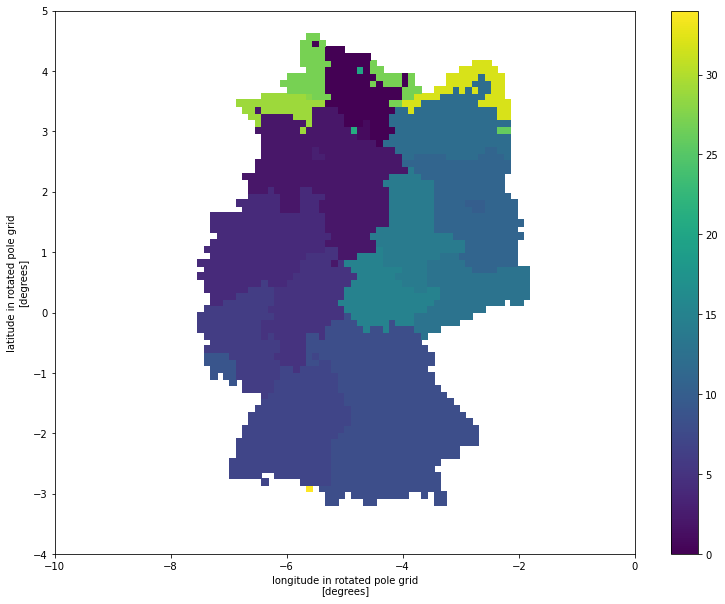

In [357]:
fig, ax = plt.subplots(figsize=(13, 10))
mask_2D.plot(xlim=(-10, 0), ylim=(-4, 5))

In [300]:
tas_mask

<xarray.DataArray (rlat: 412, rlon: 424)>
array([[nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       ...,
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan]])
Coordinates:
  * rlat     (rlat) float64 -23.38 -23.27 -23.16 -23.05 ... 21.61 21.72 21.84
  * rlon     (rlon) float64 -28.38 -28.27 -28.16 -28.05 ... 17.93 18.04 18.16
    lat      (rlat, rlon) float32 22.018326 22.058432 ... 66.82695 66.76481
    lon      (rlat, rlon) float32 -10.137466 -10.037447 ... 64.741615 64.94712

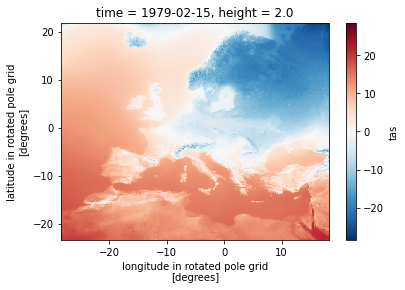

In [269]:
(tas.tas[0] - 273).plot()

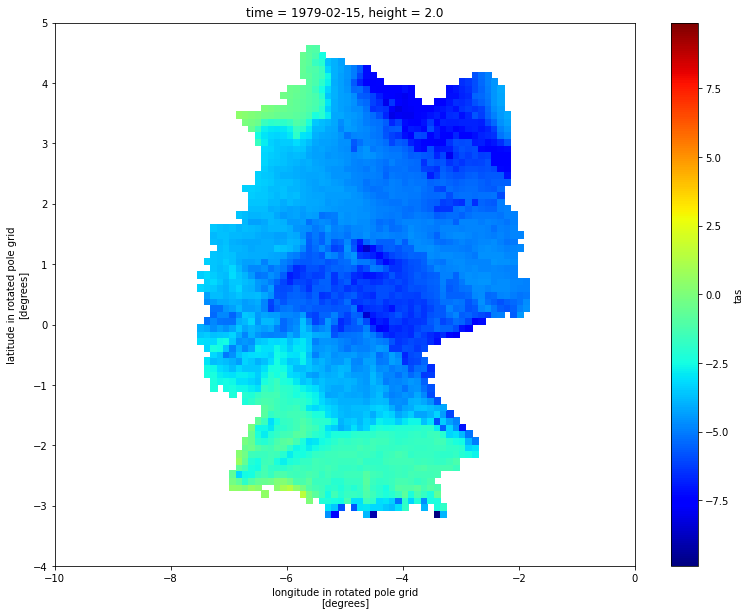

In [320]:
import hvplot.xarray
import seaborn

tas_hamburg = tas.where(tas_mask >= 0)
fig, ax = plt.subplots(figsize=(13, 10))
(tas_hamburg.tas[0] - 273.5).plot(
    cmap="jet", x="rlon", y="rlat", xlim=(-10, 0), ylim=(-4, 5)
)

In [263]:
tas_groups = tas.groupby(tas_mask)

In [264]:
def set_regionmask_labels(ds, region):
    """Set names as region label for region dimension from regionmask regions."""
    abbrevs = region[ds.region.values].abbrevs
    names = region[ds.region.values].names
    ds.coords["abbrevs"] = ("region", abbrevs)
    ds.coords["number"] = ("region", ds.region.values)
    ds["region"] = names
    return ds

TypeError: ufunc 'invert' not supported for the input types, and the inputs could not be safely coerced to any supported types according to the casting rule ''safe''

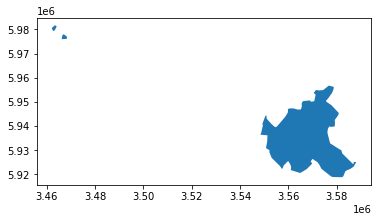

In [84]:
import numpy as np

lon = np.arange(-179.5, 180)
lat = np.arange(-89.5, 90)

filt = shp["GEN"] == "Hamburg"
hamburg = shp[filt]
hamburg.plot()


mask = hamburg.mask(tas)

In [96]:
rasm = xr.tutorial.load_dataset("rasm")

In [97]:
rasm

<xarray.Dataset>
Dimensions:  (time: 36, x: 275, y: 205)
Coordinates:
  * time     (time) object 1980-09-16 12:00:00 ... 1983-08-17 00:00:00
    xc       (y, x) float64 189.2 189.4 189.6 189.7 ... 17.65 17.4 17.15 16.91
    yc       (y, x) float64 16.53 16.78 17.02 17.27 ... 28.26 28.01 27.76 27.51
Dimensions without coordinates: x, y
Data variables:
    Tair     (time, y, x) float64 nan nan nan nan nan ... 29.8 28.66 28.19 28.21
Attributes:
    title:                     /workspace/jhamman/processed/R1002RBRxaaa01a/l...
    institution:               U.W.
    source:                    RACM R1002RBRxaaa01a
    output_frequency:          daily
    output_mode:               averaged
    convention:                CF-1.4
    references:                Based on the initial model of Liang et al., 19...
    comment:                   Output from the Variable Infiltration Capacity...
    nco_openmp_thread_number:  1
    NCO:                       netCDF Operators version 4.7.9 (Homepage = htt...
    history:                   Fri Aug  7 17:57:38 2020: ncatted -a bounds,,d...

In [107]:
rasm.Tair
mask = regionmask.defined_regions.srex.mask(tas, lon_name="lon", lat_name="lat")

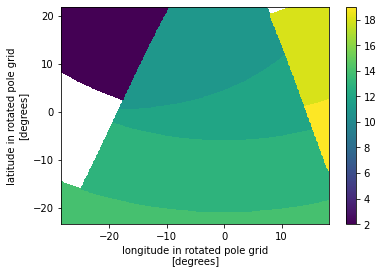

In [109]:
mask.plot()

In [116]:
tas_NEU = tas.where(mask == regionmask.defined_regions.srex.map_keys("CEU"))

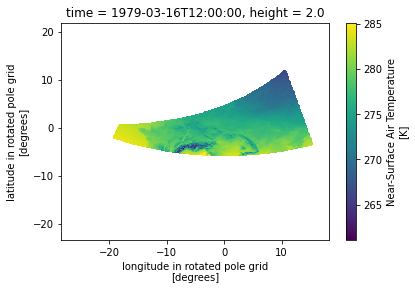

In [117]:
tas_NEU.tas[1].plot()

In [1]:
print("hello")

hello
